# Recommender system for Movie Lens Dataset using Linear Regression

In [1]:
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
base_dir = './../../Datasets/MovieLens/ml-latest-small/'
files_csv = os.listdir(base_dir)
print(files_csv)

['README.txt', 'links.csv', 'movies.csv', 'ratings.csv', 'tags.csv']


### Movies CSV

In [3]:
df_movies = pd.read_csv(base_dir+'movies.csv')
print(df_movies.shape)
df_movies.head()

(9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_titles = df_movies[['movieId', 'title', 'genres']]
df_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
genres = []

for item in df_movies[['genres']].values:
    for genre in item[0].split('|'):
        if genre not in genres:
            genres.append(genre)
print(genres, len(genres), sep='\n')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']
20


In [6]:
print(df_movies.loc[df_movies['genres'] == '(no genres listed)'].shape)
df_movies = df_movies[df_movies.genres != '(no genres listed)']
df_movies = df_movies.reset_index(drop=True)

(18, 3)


In [7]:
df_movies = df_movies.join(df_movies['genres'].str.get_dummies(sep='|'))
df_movies = df_movies.drop('genres', axis=1)
df_movies = df_movies.drop('title', axis=1)

In [8]:
print(df_movies.shape)
df_movies.head()

(9107, 20)


,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Ratings CSV

In [9]:
df_ratings = pd.read_csv(base_dir+'ratings.csv')
df_ratings = df_ratings.drop('timestamp', axis=1)
df_ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [10]:
print(df_ratings.groupby('userId')[['movieId']].count().shape)
df_ratings.groupby('userId')[['movieId']].count().head()

(671, 1)


,movieId
userId,
1,20
2,76
3,51
4,204
5,100


### Combining two CSVs user-by-user

In [11]:
df_users = []
for i in range(df_ratings.groupby('userId')[['movieId']].count().shape[0]):
    df_user = df_ratings.groupby('userId')[['userId', 'movieId', 'rating']].get_group(i+1).reset_index(drop=True)
    df_user = pd.merge(df_user, df_movies, on='movieId')
    df_users.append(df_user)
    

### User 1 

In [12]:
df = df_users[0]
print(df.shape)
df.head()

(20, 22)


,userId,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,31,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1029,3.0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,1061,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1129,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,1172,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
x = df.values[:, 3:]
numSamples = x.shape[0]
numFeatures = x.shape[1]
print(x.shape)

(20, 19)


In [14]:
y = df.values[:, 2]
y = y.reshape((numSamples,1 ))
print(y.shape)

(20, 1)


(19, 1)
[0.88635633]


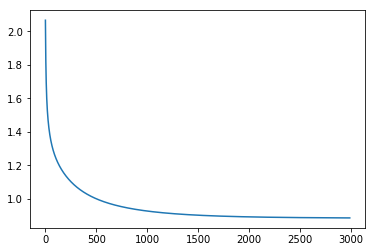

In [15]:
theta = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
print(theta.shape)
epochs = 3000
losses = []
learning_rate = 1e-2
for i in range(epochs):
    z = np.matmul(x, theta)
    l = np.sum(np.square(z - y), axis=0)/numSamples
    if not i < 10:
        losses.append(l)
    dtheta = np.dot(x.T, z - y)
    theta = theta - learning_rate*dtheta
print(losses[-1])
plt.plot(losses)

In [16]:
ratings = []
num_recom = 10
indxes = []
for i in df_movies.values[:, 1:]:
    ele = i.reshape(1, 19)
    z = np.matmul(ele, theta)
    ratings.append(z[0][0])
print('Top Recommended Movies : \n')
for i in range(num_recom):
    indx = np.argmax(ratings)
    indxes.append(indx)
    ratings[indx] = -1
    print(i+1,'. ', df_titles['title'].iloc[indx],'\n\t', df_titles['genres'].iloc[indx])

Top Recommended Movies : 

1 .  Far Off Place, A (1993) 
	 Adventure|Children|Drama|Romance
2 .  Getaway, The (1994) 
	 Action|Adventure|Crime|Drama|Romance|Thriller
3 .  Shanghai Surprise (1986) 
	 Adventure|Crime|Drama|Romance
4 .  Beat the Devil (1953) 
	 Adventure|Comedy|Crime|Drama|Romance
5 .  Palmetto (1998) 
	 Crime|Drama|Mystery|Romance|Thriller
6 .  Pelican Brief, The (1993) 
	 Crime|Drama|Mystery|Romance|Thriller
7 .  In the Cut (2003) 
	 Crime|Drama|Mystery|Romance|Thriller
8 .  21 Grams (2003) 
	 Crime|Drama|Mystery|Romance|Thriller
9 .  Wild at Heart (1990) 
	 Crime|Drama|Mystery|Romance|Thriller
10 .  Secret in Their Eyes, The (El secreto de sus ojos) (2009) 
	 Crime|Drama|Mystery|Romance|Thriller
